In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
del iris_df['petal length (cm)']
del iris_df['petal width (cm)']
iris_class = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_class, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# тут вроде все неплохо
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,2,2
6,0,0
7,0,0
8,1,2
9,0,0


In [21]:
# точность в принцципе годная
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

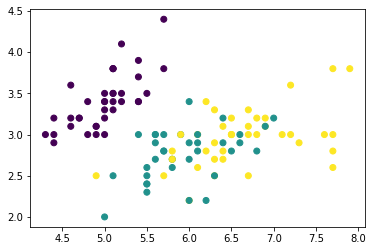

In [22]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

Хмм, ну вот такое интересное разделение - одна группа четко обособлена и еще две довольно забавно перекрещиваются.

In [23]:
lda.coef_

array([[-5.9267348 ,  8.16646545],
       [ 1.56857152, -3.85103202],
       [ 4.10972961, -4.18432753]])

In [25]:
lda.means_

array([[4.94193548, 3.33548387],
       [5.88636364, 2.73409091],
       [6.5       , 2.95405405]])

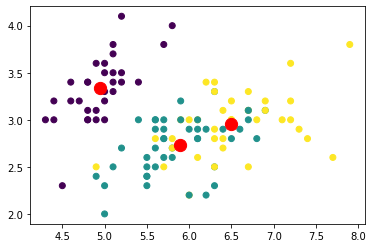

In [29]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='o')
plt.show()

Вот такие центры у нас получились

In [39]:
# преобразуем наш датафрейм
X = iris_df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

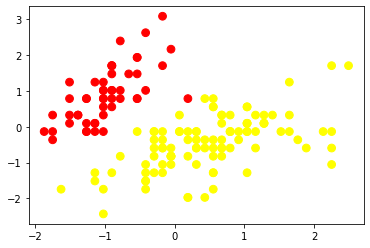

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

Что и следовало ожидать, получили два кластера. попробуем получить побольше

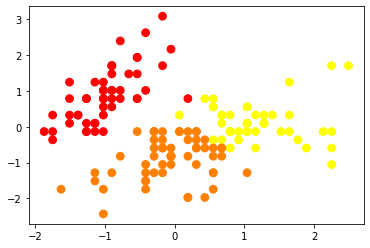

In [41]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

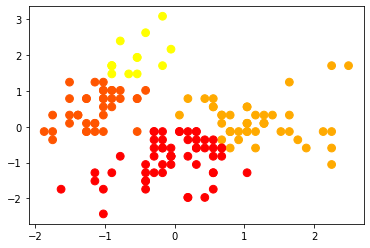

In [42]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

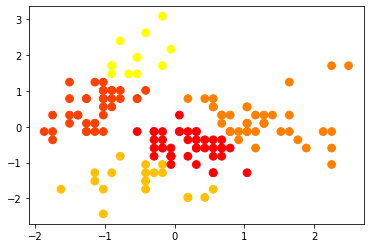

In [43]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

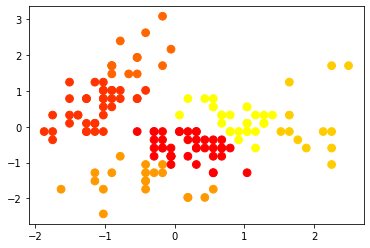

In [44]:
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

Ну вот, наигрались, оптимальным мне показался вариант с тремя кластерами, разделенными с помощью kmeans